After seeing a [reddit post](https://www.reddit.com/r/proceduralgeneration/comments/11bztzm/2d_map_generator_in_plain_javascript/) about generating 2D maps with islands we wanted to try doing that too.
Our approach is not based on the post though. As far as we know, they use perlin noise.
We try to figure out a method ourselves.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.linspace(0, 2*np.pi, 100)

In [3]:
sin = lambda x, a, c : a*np.sin(c*x)
cos = lambda x, a, c : a*np.cos(c*x)

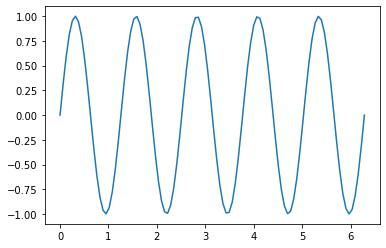

In [4]:
plt.plot(X, sin(X, 1, 5))

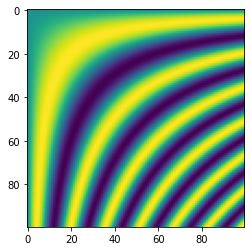

In [5]:
xvalues = np.linspace(0, 2*np.pi, 100)
yvalues = np.linspace(0, 2*np.pi, 100)
xx, yy = np.meshgrid(xvalues, yvalues)

plt.imshow(sin(xx*yy, 1, 1))

## Trigonometrics

$$ a_1\sin(b_1+c_1x)+a_2\cos(b_2+c_2y)$$

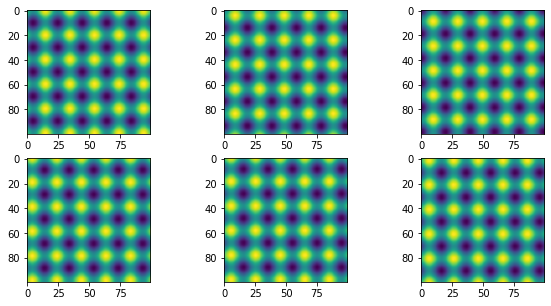

In [6]:
xvalues = np.linspace(0, 2*np.pi, 100)
yvalues = np.linspace(0, 2*np.pi, 100)
xx, yy = np.meshgrid(xvalues, yvalues)

_m = lambda : sin(
    np.random.random()*100+xx, 2, 5) + cos(
    np.random.random()*100+yy, 2, 5) 

def m():
    retval = _m()
    retval -= retval.min()
    if retval.max() != 0:
        retval /= retval.max()
    return retval

f, ax = plt.subplots(2,3, figsize=(10, 5))

ax[0,0].imshow(m())
ax[0,1].imshow(m())
ax[0,2].imshow(m())
ax[1,0].imshow(m())
ax[1,1].imshow(m())
ax[1,2].imshow(m())

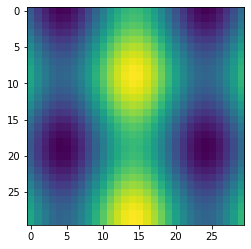

In [7]:
islands = m()
for _ in range(10):
    islands += m()
    islands /= islands.max()
islands = islands[10:40, 10:40]
    
plt.imshow(islands)

Trigonometric functions bring too much symmetrie.

## Gaussians

In [8]:
from scipy.stats import norm

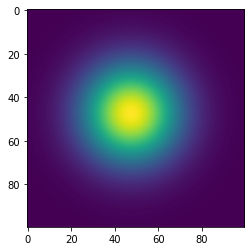

In [9]:
_gaus = lambda mu, sigma : norm.pdf(xvalues, mu, sigma)

def gaus(mu1, mu2, sigma):
    x = _gaus(mu1, sigma)
    y = _gaus(mu2, sigma)
    xx, yy = np.meshgrid(x,y)
    return xx*yy

plt.imshow(gaus(3, 3, 1))

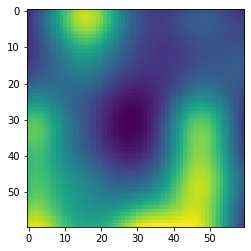

In [10]:
def gen_islands():
    islands = gaus(np.random.randint(6), np.random.randint(6), .5)
    for _ in range(100):
        islands += gaus(np.random.randint(6), np.random.randint(6), .5)
    islands = islands[:60, :60]
    return islands

islands = gen_islands()
plt.imshow(islands)

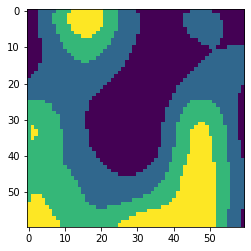

In [11]:
def sel(v, thrs):
    for _ in range(4):
        if v < thrs[_]:
            return _
    return 4

def thr_islands(islands):
    thr = (islands.max() - islands.min()) / 4
    thrs = [islands.min(), islands.min()+thr, islands.min()+2*thr, islands.min()+3*thr]
    
    island = islands.copy()
    for x_ in range(islands.shape[0]):
        for y_ in range(islands.shape[1]):
            island[x_, y_] = sel(islands[x_, y_], thrs)
    return island

island = thr_islands(islands)
plt.imshow(island)

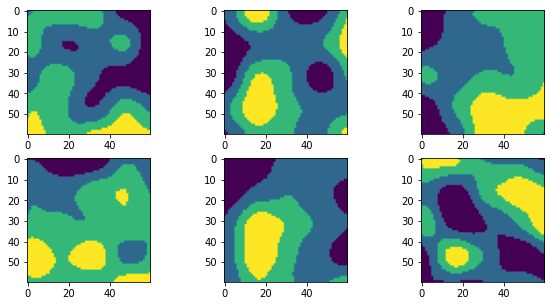

In [12]:
def gen_island():
    islands = gen_islands()
    island = thr_islands(islands)
    return island

f, ax = plt.subplots(2,3, figsize=(10, 5))

ax[0,0].imshow(gen_island())
ax[0,1].imshow(gen_island())
ax[0,2].imshow(gen_island())
ax[1,0].imshow(gen_island())
ax[1,1].imshow(gen_island())
ax[1,2].imshow(gen_island())

This looks alright! We generated some islands =)